In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Задание 1
Реализовать усреднение зашумленного сигнала по формуле 1. Вывести спектр усредненного и зашумленного сигнала. Объяснить результат.

![Формула 1](pics/running_mean_filter.png)

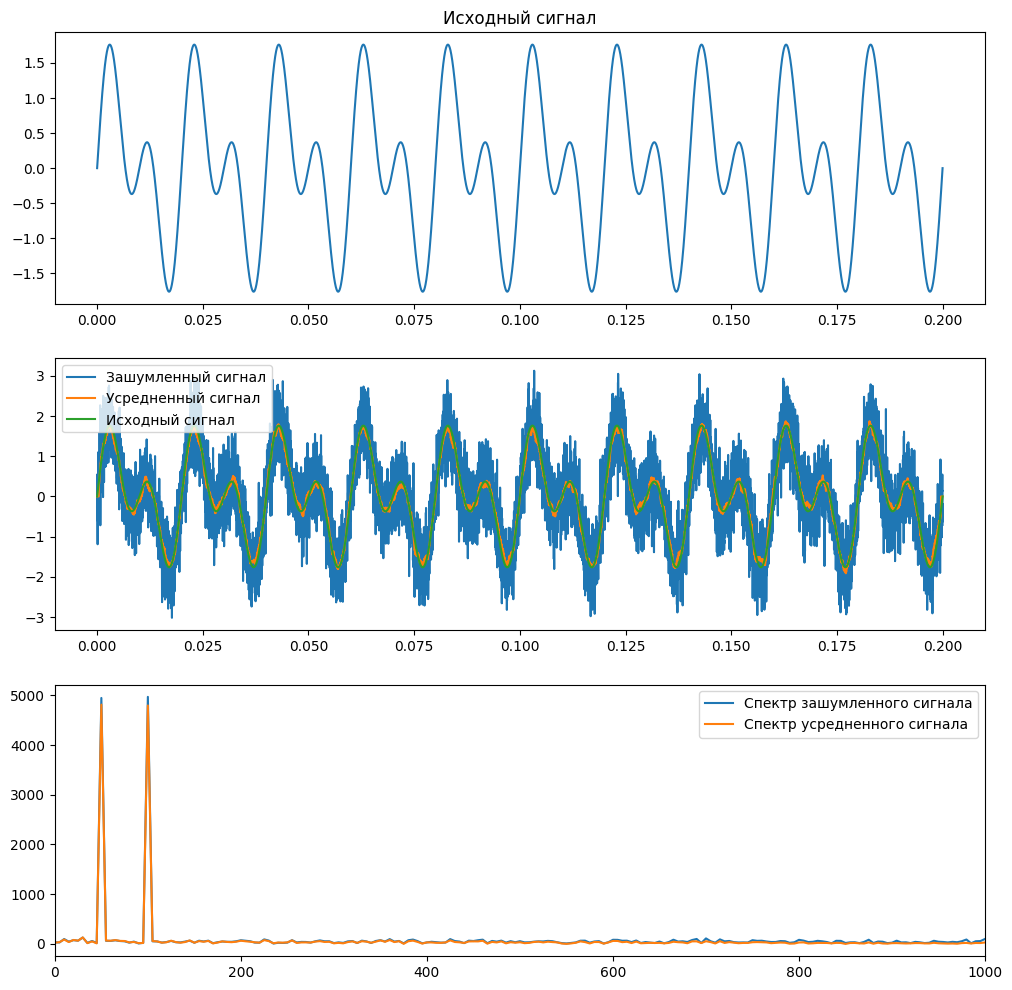

In [2]:
signal = lambda t: np.sin(50 * 2 * np.pi * t) + np.sin(100 * 2 * np.pi * t)
noised_signal = lambda t: t + np.random.normal(0, 0.5, len(t))
running_mean_filter = lambda t, i, k: (2 * k + 1)**-1 * np.sum(t[i - k: i + k])

n = 10000
time_0 = 0
time_1 = 0.2
k = 20

x = np.linspace(time_0, time_1, n)
x_freq = np.linspace(0, 25000, 5000)

y = signal(x)
y_noised = noised_signal(y)
y_mean_filtered = np.zeros_like(y)

for i in range(k, n - k):
    y_mean_filtered[i] = running_mean_filter(y_noised, i, k)

y_noised_fft = np.fft.fft(y_noised)
y_filtered_fft = np.fft.fft(y_mean_filtered)

plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.plot(x, y)
plt.title("Исходный сигнал")

plt.subplot(3, 1, 2)
plt.plot(x, y_noised, label="Зашумленный сигнал")
plt.plot(x, y_mean_filtered, label="Усредненный сигнал")
plt.plot(x, y, label="Исходный сигнал")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(x_freq, np.abs(y_noised_fft[:len(y_noised_fft)//2]), label="Спектр зашумленного сигнала")
plt.plot(x_freq, np.abs(y_filtered_fft[:len(y_filtered_fft)//2]), label="Спектр усредненного сигнала")
plt.xlim(0, 1000)
plt.legend()


plt.show()

### Задание 2
Реализовать усреднение зашумленного сигнала по формуле 2. Вывести спектр усредненного и зашумленного сигнала. Сопоставить усреднение по
Гауссу и среднему значению, как это сделано в задании 1. Объяснить результат.

![Формула 2](pics/gaussian_smoothing_filter.png)
![Формула 2](pics/gaussian_smoothing_func.png)

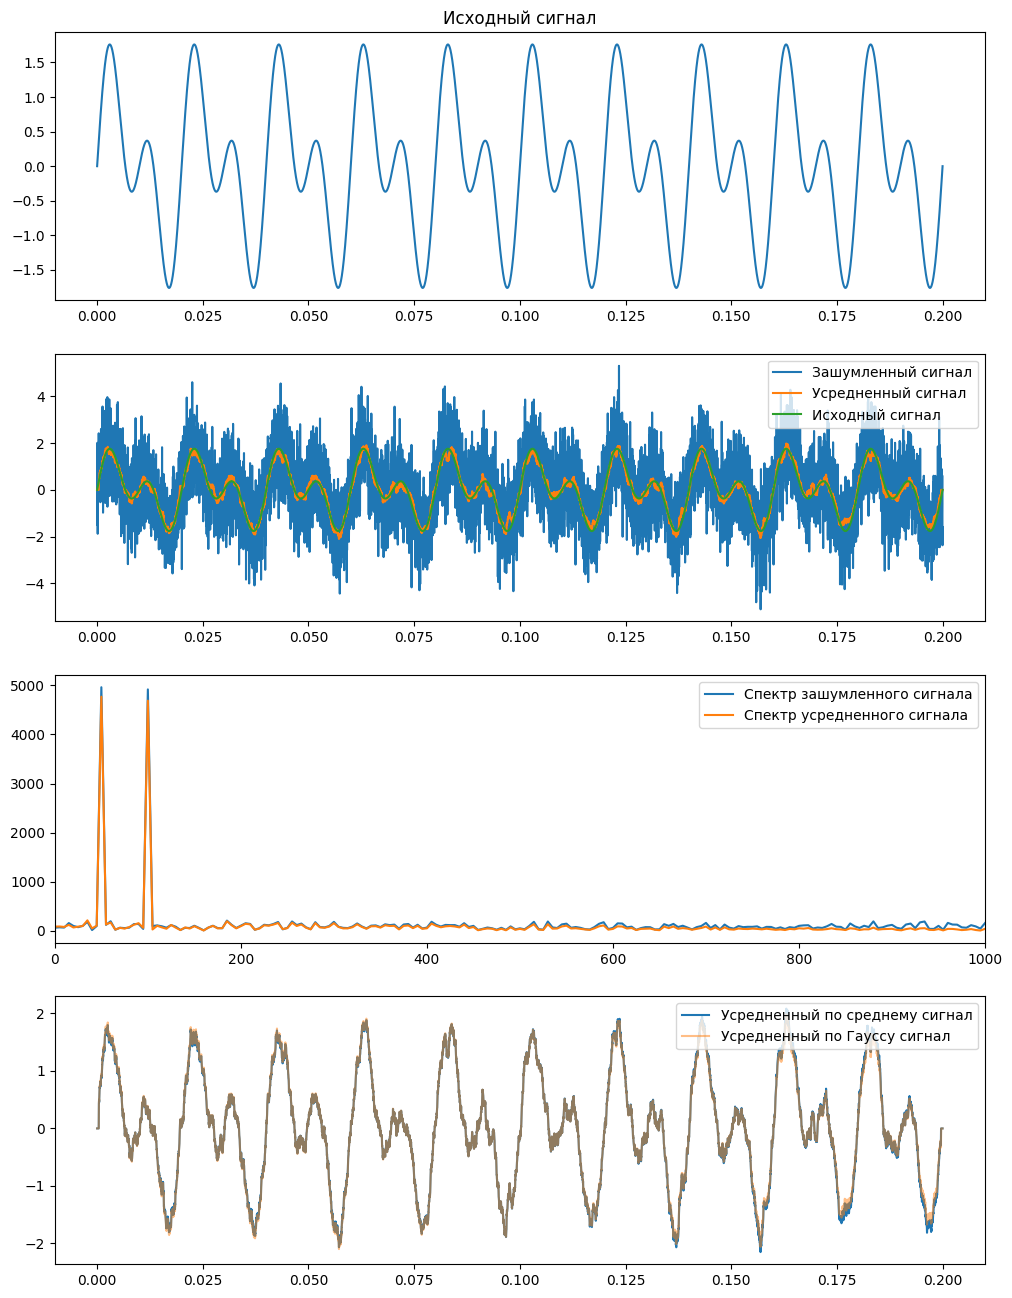

In [307]:
gaussian = lambda t, w: np.exp((-4 * np.log(2) * t**2) / (w**2))
gaussian_smoothing_filter = lambda t, g, i, k: np.sum(t[i - k:i + k] @ g[i - k:i + k])
# np.array([g[-i] for i in range(i - k, i + k)])
n = 10000
k = 20
x_gaussian = np.linspace(0, k, n)
g = gaussian(x_gaussian, 5*k)

y_gauss_filtered = np.zeros_like(y)
for i in range(k, n - k + 1):
    y_gauss_filtered[i] = gaussian_smoothing_filter(y_noised, g, i, k) / (2*k)

y_filtered_fft = np.fft.fft(y_gauss_filtered)

plt.figure(figsize=(12, 16))

plt.subplot(4, 1, 1)
plt.plot(x, y)
plt.title("Исходный сигнал")

plt.subplot(4, 1, 2)
plt.plot(x, y_noised, label="Зашумленный сигнал")
plt.plot(x, y_gauss_filtered, label="Усредненный сигнал")
plt.plot(x, y, label="Исходный сигнал")
plt.legend(loc='upper right')

plt.subplot(4, 1, 3)
plt.plot(x_freq, np.abs(y_noised_fft[:len(y_noised_fft)//2]), label="Спектр зашумленного сигнала")
plt.plot(x_freq, np.abs(y_filtered_fft[:len(y_filtered_fft)//2]), label="Спектр усредненного сигнала")
plt.xlim(0, 1000)
plt.legend(loc='upper right')

plt.subplot(4, 1, 4)
plt.plot(x, y_mean_filtered, label="Усредненный по среднему сигнал")
plt.plot(x, y_gauss_filtered, label="Усредненный по Гауссу сигнал", alpha=0.5)
plt.legend(loc='upper right')

plt.show()

### Задание 3
Воспользоваться усреднением по Гауссу для обработки сигнала, состоящего из всплесков пиков.

Всплеск каждого пика является случайно величиной. Амплитуда каждого пика A=1 V, рис.3.

![Рисунок 3](pics/spikes.png)

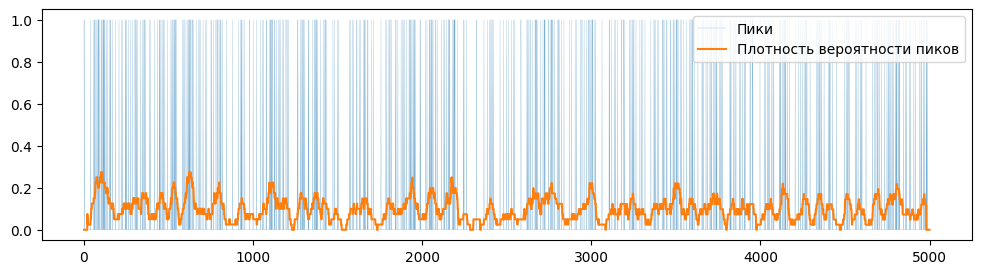

In [315]:
n = 5000
sample_ratio = 0.1

signal = np.zeros(n)

k = 20
x_gaussian = np.linspace(0, k, n)
g = gaussian(x_gaussian, 9*k)

for sample in random.sample(range(n), int(n*sample_ratio)):
    signal[sample] = 1
    
# gauss_smoothed_signal = gauss_smoother(signal, 10)
y_gauss_filtered = np.zeros_like(signal)
for i in range(k, n - k):
    y_gauss_filtered[i] = gaussian_smoothing_filter(signal, g, i, k) / (2 * k)

plt.figure(figsize=(12, 3))

plt.plot(signal, lw=0.2, label='Пики', alpha=0.6)
plt.plot(y_gauss_filtered, label='Плотность вероятности пиков')
plt.legend(loc='upper right')

plt.show()

### Задание 4
Реализовать медианный фильтр для очистки сигнала от случайных всплесков в сигнале.
 
В этом случае амплитуда всплеска сигнала уже не является постоянной и является случайной величиной.
Результат обработки представлен оранжевой линией на рис. 4.

Замечание: Реализовать фильтрацию лучше в два этапа. Вначале ввести порог, выше которого пик будет
удаляться, затем применить медианный фильтр.

![Рисунок 4](pics/median.png)

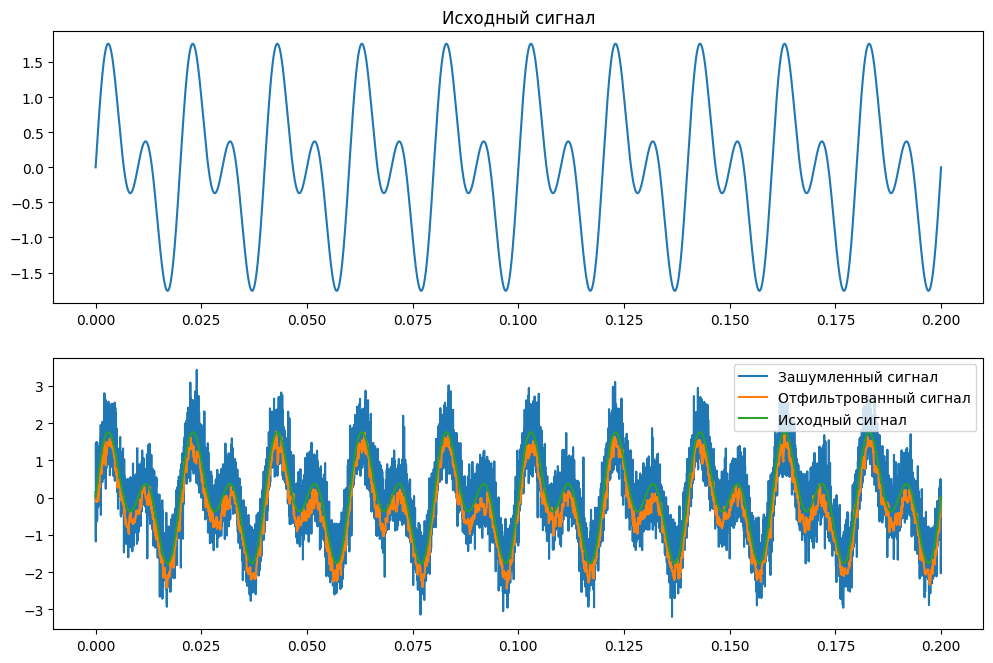

In [325]:
n = 10000
time_0 = 0
time_1 = 0.2
k = 9

x = np.linspace(time_0, time_1, n)
y = signal(x)
y_noised = noised_signal(y)

y_median_filtered = np.zeros(n)
for i in range(k, n - k + 1):
    y_median_filtered[i] = np.sort(y_noised[i-k:i+k])[4]

plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.plot(x, y)
plt.title("Исходный сигнал")

plt.subplot(3, 1, 2)
plt.plot(x, y_noised, label="Зашумленный сигнал")
plt.plot(x, y_median_filtered, label="Отфильтрованный сигнал")
plt.plot(x, y, label="Исходный сигнал")
plt.legend()

plt.show()

### Задание 5
Реализовать метод исключения линейного тренда из сигнала с использованием критерия Байесовской информации (BIC), на рис. 5.

Представить спектр исходного сигнала и сигнала в котором был исключен тренд, объяснить результат сравнения.

![Критерий Байесовской информации](pics/BIC.png)

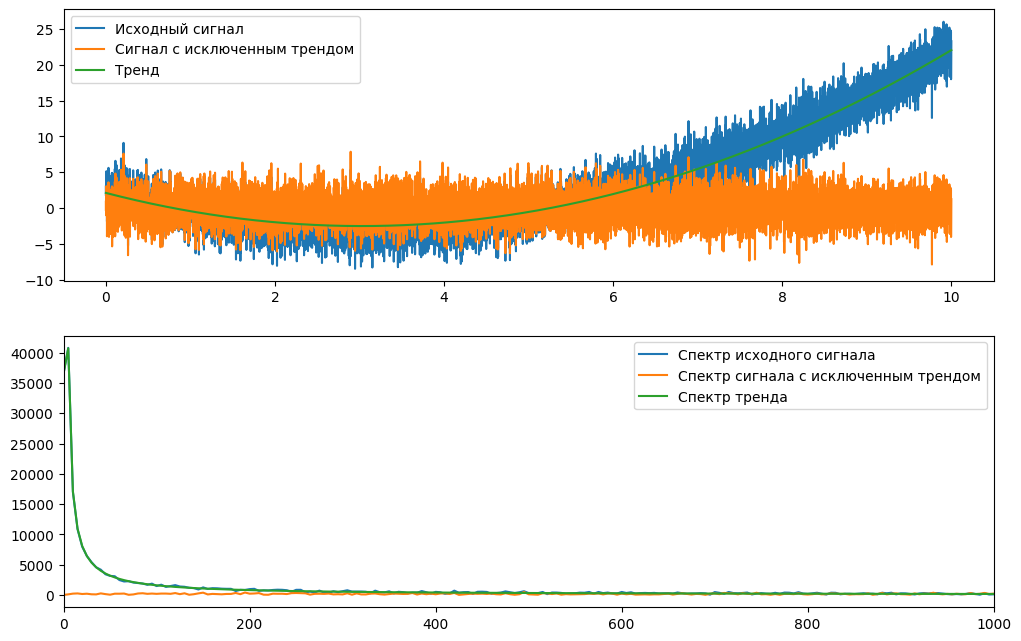

In [392]:
n = 10000

# x = np.linspace(0, 0.2, n)
# x_freq = np.linspace(0, 2.5 * n, n // 2)
# y  = signal(x)

np.random.seed(42)
x = np.linspace(0, 10, n)
x_freq = np.linspace(0, 2.5 * n, n // 2)
true_trend = 0.5 * x**2 - 3 * x + 2  # Квадратичный тренд
noise = np.random.normal(0, 2, size=x.shape)
y = true_trend + noise

def compute_bic(y, y_pred, num_params):
    rss = np.sum((y - y_pred)**2)
    n = len(y)
    bic = n * np.log(rss / n) + num_params * np.log(n)
    return bic

degrees = range(1, 5)
bic_values = []
models = []

for degree in degrees:
    coeffs = np.polyfit(x, y, degree)
    poly_model = np.poly1d(coeffs)
    y_pred = poly_model(x)
    bic = compute_bic(y, y_pred, degree + 1)
    bic_values.append(bic)
    models.append(poly_model)

optimal_degree = degrees[np.argmin(bic_values)]
optimal_model = models[np.argmin(bic_values)]
trend = optimal_model(x)
detrended_signal = y - trend

y_fft = np.fft.fft(y)
y_detrended_fft = np.fft.fft(detrended_signal)
trend_fft = np.fft.fft(trend)

plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.plot(x, y, label='Исходный сигнал')
plt.plot(x, detrended_signal, label='Сигнал с исключенным трендом')
plt.plot(x, trend, label="Тренд")
plt.legend(loc="upper left")

plt.subplot(3, 1, 2)
plt.plot(x_freq, np.abs(y_fft[:len(y_fft)//2]), label="Спектр исходного сигнала")
plt.plot(x_freq, np.abs(y_detrended_fft[:len(y_detrended_fft)//2]), label="Спектр сигнала с исключенным трендом")
plt.plot(x_freq, np.abs(trend_fft[:len(trend_fft)//2]), label="Спектр тренда")
plt.xlim(0, 1000)
plt.legend()

plt.show()